In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
DC = np.load('../Bases/Criados/Treino_Teste/treino_teste.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = DC['X_treino'], DC['X_teste'], DC['y_treino'], DC['y_teste'], list(DC['feature_names'])

In [4]:
len(X_treino)

14345

In [5]:
DC_over = np.load('../Bases/Criados/Treino_Teste/over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= DC_over['X_treino'], DC_over['X_teste'], DC_over['y_treino'], DC_over['y_teste'], list(DC_over['feature_names'])

In [6]:
len(X_treino_over)

27102

In [7]:
DC_under = np.load('../Bases/Criados/Treino_Teste/under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = DC_under['X_treino'], DC_under['X_teste'], DC_under['y_treino'], DC_under['y_teste'], list(DC_under['feature_names'])

In [8]:
len(X_treino_under)

14092

In [9]:
DC_random_under = np.load('../Bases/Criados/Treino_Teste/random.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = DC_random_under['X_treino'], DC_random_under['X_teste'], DC_random_under['y_treino'], DC_random_under['y_teste'], list(DC_random_under['feature_names'])

In [10]:
len(X_treino_rd_under)

1588

In [11]:
DC_DSTO = np.load('../Bases/Criados/Treino_Teste/dsto.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = DC_DSTO['X_treino'], DC_DSTO['X_teste'], DC_DSTO['y_treino'], DC_DSTO['y_teste'], list(DC_DSTO['feature_names'])

In [12]:
len(X_treino_DSTO)

27102

## Parametros e funcoes

In [13]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

# Modelos

In [14]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict([('criterion', 'gini'), ('max_depth', 37), ('max_features', 5), ('min_samples_leaf', 4), ('min_samples_split', 14), ('n_estimators', 79)])
Melhor pontuação de validação cruzada: 0.94


### Random UnderSampling

In [15]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict([('criterion', 'entropy'), ('max_depth', 47), ('max_features', 2), ('min_samples_leaf', 3), ('min_samples_split', 16), ('n_estimators', 76)])
Melhor pontuação de validação cruzada: 0.69


In [16]:
best_model_bayes = bayes_search.best_estimator_

In [17]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [18]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.11      0.69      0.19       359
         2.0       0.97      0.65      0.78      5789

    accuracy                           0.65      6148
   macro avg       0.54      0.67      0.48      6148
weighted avg       0.92      0.65      0.74      6148



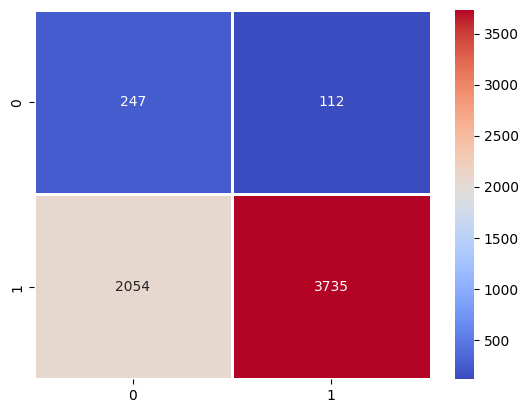

In [19]:
cfm_matrix = confusion_matrix(y_teste_rd_under, previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
Q00201: 0.10966331437117689
P00104: 0.07201775361512133
N016: 0.06753097369252192
P00404: 0.06534173388746435
V0001: 0.05058359376708208
N00101: 0.04878684932495864
P01101: 0.04171891938278188
P018: 0.03884288131987779
Q03001: 0.037817377787131144
Escolaridade: 0.03324681202953982
Carga_horaria_semanal: 0.03150680747146631
P02001: 0.03140854137947196
Renda: 0.029780768066787432
P02501: 0.028929284682000213
Tempo_parou_fumar: 0.02836896101673099
P04502: 0.028272147420206187
Quant_trabalhos: 0.02437213071783024
Inicio_tabagismo: 0.023903841899034283
C009: 0.022806110655014547
Consumo_alcool: 0.022081611754432583
Atividade_fisica_semanal: 0.02116891197686016
B001: 0.019765553946086
V0026: 0.01973358219742321
P068: 0.01644454623307977
Instituicao_plano: 0.015074206283072891
Cobertura_plano: 0.014022202188782439
P02602: 0.013961728311963484
Intensidade_fumo: 0.012505647342770166
Q11006: 0.01209246843253324
Q128: 0.011772238873789767
T001: 0.006478499973008346


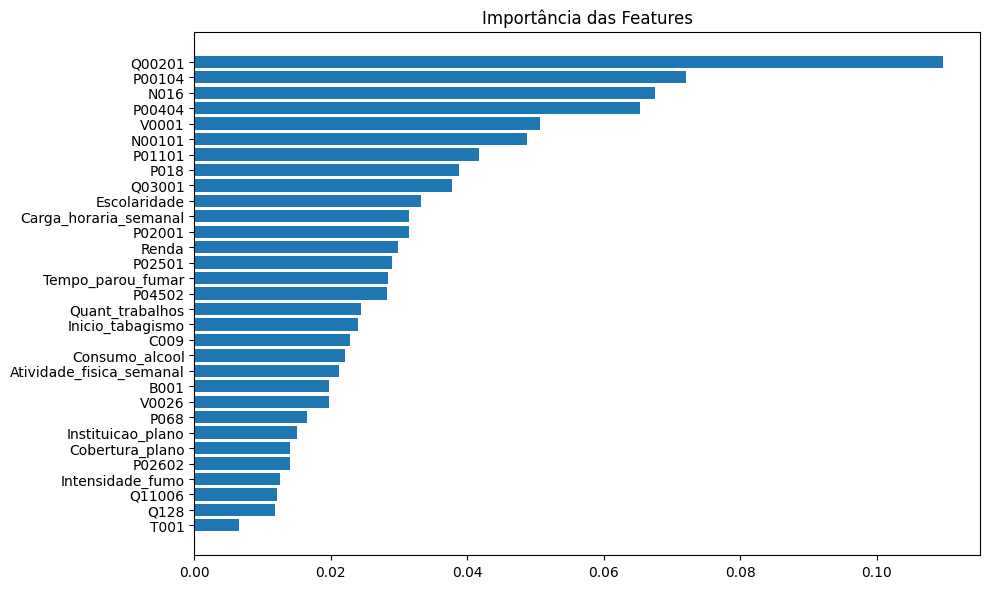

In [22]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")

# Usando o tamanho real das importâncias para evitar erro de shape
plt.barh(range(len(importancias)), importancias[indices_ordenados], align="center")

# Convertendo os nomes para array e ajustando os labels do eixo Y
nomes_array = np.array(nomes_das_features)
plt.yticks(range(len(importancias)), nomes_array[indices_ordenados])

# Inverter o eixo y para que as features mais importantes fiquem no topo
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
precision    recall  f1-score   support

         1.0       0.11      0.69      0.19       359
         2.0       0.97      0.65      0.78      5789

    accuracy                           0.65      6148
   macro avg       0.54      0.67      0.48      6148
weighted avg       0.92      0.65      0.74      6148

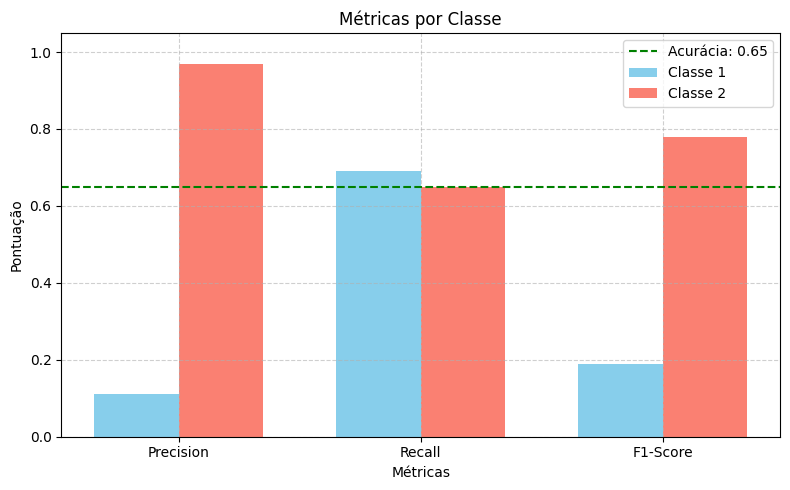

In [4]:
import matplotlib.pyplot as plt

# Métricas de exemplo (substitua pelos seus valores reais)
precision_1 = 0.11
precision_2 = 0.97
recall_1 = 0.69
recall_2 = 0.65
f1_1 = 0.19
f1_2 = 0.78
accuracy = 0.65

# Organização dos dados
metrics = ['Precision', 'Recall', 'F1-Score']
classes_1 = [precision_1, recall_1, f1_1]
classes_2 = [precision_2, recall_2, f1_2]

x = range(len(metrics))
bar_width = 0.35

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([i - bar_width/2 for i in x], classes_1, bar_width, label='Classe 1', color='skyblue')
ax.bar([i + bar_width/2 for i in x], classes_2, bar_width, label='Classe 2', color='salmon')

# Adicionando a acurácia como linha horizontal
ax.axhline(y=accuracy, color='green', linestyle='--', label=f'Acurácia: {accuracy:.2f}')

# Estilização
ax.set_xlabel('Métricas')
ax.set_ylabel('Pontuação')
ax.set_title('Métricas por Classe')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()